In [5]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

agent = '1'

with open(f'./agents/{agent}/epochs.json') as file:
  epochs = json.load(file)
with open(f'./agents/{agent}/evaluations.json') as file:
  evaluations = json.load(file)

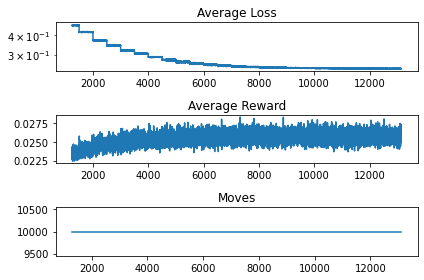

In [6]:
x = [i['epoch'] for i in epochs][1250:]
epochs_y = [i['loss']**0.5 for i in epochs if i['epoch'] in x]
rewards_y = [i['reward'] for i in epochs if i['epoch'] in x]

figure, axis = plt.subplots(3,1)

axis[0].set_title('Average Loss')
axis[0].plot(x,epochs_y)
axis[0].set_yscale('log')

axis[1].set_title('Average Reward')
axis[1].plot(x,rewards_y)


axis[2].set_title('Moves')
axis[2].plot([i['epoch'] for i in evaluations if i['epoch'] in x],[i['moves'] for i in evaluations if i['epoch'] in x])

# space out plots
figure.tight_layout()